<a href="https://colab.research.google.com/github/GaneshiUmayangana/Probability-and-statistic/blob/main/Probability_and_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [106]:
df = pd.read_excel("Data Collection for IS4301 - DMME (Responses).xlsx")

In [107]:
df

,Timestamp,Last 4-digits of the Reg No. ( To avoid duplicate entries only ),Gender,Age,Height ( cm ) - Do not include units,Weight ( kg ) - Do not include units,Study hours per week (hours) Do not put units,Mode of transportation,Favorite food,Sleep hours per day (don't put units; also can be an answer).,OGPA,preferred learning style (be truthful),"mobile service provider in use (dialog , mobitel . etc)"
0,2025-06-19 21:48:00.713,5096,Male,23,173,65.0,7,motor bike,Kottu,6,3.210,by watching videos,Mobitel
1,2025-06-19 21:49:15.664,5363,Male,22,167,62.0,15,By foot,Pizza,7,3.310,by watching videos,Hutch
2,2025-06-19 21:49:38.160,5044,Male,23,156,64.0,22,By foot,Briyani,6,3.050,with the help of AI,Hutch
3,2025-06-19 21:50:13.017,5154,Male,24,175,55.0,25,By foot,Roti,6,3.260,by watching videos,Dialog
4,2025-06-19 21:50:41.229,5413,Male,24,176,74.0,35,motor bike,Kottu,5,3.070,by watching videos,Dialog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2025-06-26 10:00:27.639,5257,Female,24,162,57.0,4,By foot,Pittu and curry,6,3.150,writing and looking through reference books,Dialog
77,2025-06-26 11:01:08.882,5299,Male,23,156,76.0,4,By foot,Those,6,3.336,by watching videos,Airtel
78,2025-06-26 12:51:47.226,5220,Male,23,155,58.0,20,By foot,Fried rice,6,3.090,writing and looking through reference books,Mobitel
79,2025-06-26 13:15:24.067,5063,Male,23,173,58.0,21,By foot,Kottu,6,3.155,by watching videos,Mobitel


# Shape of the dataset

In [108]:
df.shape

(81, 13)

THis dataset include the 81 rows (observations) and the 13 columns(variables)

# Clean the datset

### Check the missing values

In [109]:
df.isnull().sum()

,0
Timestamp,0
Last 4-digits of the Reg No. ( To avoid duplicate entries only ),0
Gender,0
Age,0
Height ( cm ) - Do not include units,0
Weight ( kg ) - Do not include units,0
Study hours per week (hours) Do not put units,0
Mode of transportation,0
Favorite food,0
Sleep hours per day (don't put units; also can be an answer).,0


In that dataset not include the missing values

### Check the duplicates

In [110]:
df.duplicated().sum()

np.int64(0)

This dataset did not include the duplicated values

##Rename the dataset variable names and drop the useless variables

In [111]:
df.columns

Index(['Timestamp',
       'Last 4-digits of the Reg No. ( To avoid duplicate entries only )',
       'Gender', 'Age', 'Height ( cm ) - Do not include units',
       'Weight ( kg ) - Do not include units',
       'Study hours per week (hours) Do not put units',
       'Mode of transportation', 'Favorite food ',
       'Sleep hours per day (don't put units;  also can be an answer).',
       'OGPA ', 'preferred learning style (be truthful)',
       'mobile service provider in use (dialog , mobitel . etc)'],
      dtype='object')

In [112]:
df = df.drop('Timestamp', axis=1)
df.columns

Index(['Last 4-digits of the Reg No. ( To avoid duplicate entries only )',
       'Gender', 'Age', 'Height ( cm ) - Do not include units',
       'Weight ( kg ) - Do not include units',
       'Study hours per week (hours) Do not put units',
       'Mode of transportation', 'Favorite food ',
       'Sleep hours per day (don't put units;  also can be an answer).',
       'OGPA ', 'preferred learning style (be truthful)',
       'mobile service provider in use (dialog , mobitel . etc)'],
      dtype='object')

In [113]:
df = df.rename(columns={
    'Last 4-digits of the Reg No. ( To avoid duplicate entries only )': 'Reg_No(last 4 digits)',
    'Height ( cm ) - Do not include units': 'Height',
    'Weight ( kg ) - Do not include units': 'Weight',
    'Study hours per week (hours) Do not put units': 'Study hours per week',
    "Sleep hours per day (don't put units;  also can be an answer).": 'Sleep hours per day',
    'preferred learning style (be truthful)': 'preferred learning style',
    'mobile service provider in use (dialog , mobitel . etc)': 'mobile service provider in use'
})


df.columns

Index(['Reg_No(last 4 digits)', 'Gender', 'Age', 'Height', 'Weight',
       'Study hours per week', 'Mode of transportation', 'Favorite food ',
       'Sleep hours per day', 'OGPA ', 'preferred learning style',
       'mobile service provider in use'],
      dtype='object')

In [114]:
df.dtypes

,0
Reg_No(last 4 digits),int64
Gender,object
Age,int64
Height,object
Weight,float64
Study hours per week,int64
Mode of transportation,object
Favorite food,object
Sleep hours per day,object
OGPA,float64


Height can't be a categorical variable. convert the height data type as float values

In [115]:
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df.dtypes

,0
Reg_No(last 4 digits),int64
Gender,object
Age,int64
Height,float64
Weight,float64
Study hours per week,int64
Mode of transportation,object
Favorite food,object
Sleep hours per day,object
OGPA,float64


Sleeping hours can't be a categorical variiable

In [116]:
df['Sleep hours per day'].unique()

array([6, 7, 5, 4, 8, 10, 'Chicken', '5 hours', 6.5, '6/7', 60],
      dtype=object)

In [118]:
#remove 'Chicken' and '6/7' observations included in df['Sleep hours per day'] and '5 hours' as 5

df = df[~df['Sleep hours per day'].isin(['Chicken', '6/7'])]
df['Sleep hours per day'] = df['Sleep hours per day'].replace('5 hours', '5')
df['Sleep hours per day'] = pd.to_numeric(df['Sleep hours per day'], errors='coerce')

In [121]:
df.dtypes

,0
Reg_No(last 4 digits),int64
Gender,object
Age,int64
Height,float64
Weight,float64
Study hours per week,int64
Mode of transportation,object
Favorite food,object
Sleep hours per day,float64
OGPA,float64


## Quantitative and Qualitative variables

In [122]:
quantitative_variables = df.select_dtypes(include=[np.number])
qualitative_variables = df.select_dtypes(exclude=[np.number])

In [123]:
quantitative_variables.columns

Index(['Reg_No(last 4 digits)', 'Age', 'Height', 'Weight',
       'Study hours per week', 'Sleep hours per day', 'OGPA '],
      dtype='object')

In [124]:
qualitative_variables.columns

Index(['Gender', 'Mode of transportation', 'Favorite food ',
       'preferred learning style', 'mobile service provider in use'],
      dtype='object')

In [130]:
for column in qualitative_variables.columns:
  print(f"Categories for '{column}': {qualitative_variables[column].unique()}")

Categories for 'Gender': ['Male' 'Female']
Categories for 'Mode of transportation': ['motor bike' 'By foot' 'Bicycle' 'By bus']
Categories for 'Favorite food ': ['Kottu' 'Pizza' 'Briyani' 'Roti' 'rice' 'Rice' 'rice and curry'
 'Rice and Curry ' 'Chocolate ' 'Idiyappam' 'Ice cream' 'Burger '
 'Rice and Curry' 'String hoppers' 'Fried rice' 'pizza' 'cake' 'Pasta'
 'BIRIYANI, KOTTU' 'Rice and currie ' 'Rice and curry' 'Milk rice'
 'Fruits' 'Pizza ' 'Koththu' 'Caramel Pudding' 'Ice cream ' 'noodles '
 'Biriyani' 'Rice and curry ' 'Donuts' 'string hoppers' 'Cake'
 'Butter cake' 'Masala cheese koththu' 'Fried Rice ' 'Pittu and curry '
 'Those' 'Fried rice ']
Categories for 'preferred learning style': ['by watching videos' 'with the help of AI' 'by learning from others'
 'by attending to lectures' 'writing and looking through reference books']
Categories for 'mobile service provider in use': ['Mobitel' 'Hutch' 'Dialog' 'Airtel']


Favoirite food category rebased

In [126]:
qualitative_variables['Favorite food '].unique()

array(['Kottu', 'Pizza', 'Briyani', 'Roti', 'rice', 'Rice',
       'rice and curry', 'Rice and Curry ', 'Chocolate ', 'Idiyappam',
       'Ice cream', 'Burger ', 'Rice and Curry', 'String hoppers',
       'Fried rice', 'pizza', 'cake', 'Pasta', 'BIRIYANI, KOTTU',
       'Rice and currie ', 'Rice and curry', 'Milk rice', 'Fruits',
       'Pizza ', 'Koththu', 'Caramel Pudding', 'Ice cream ', 'noodles ',
       'Biriyani', 'Rice and curry ', 'Donuts', 'string hoppers', 'Cake',
       'Butter cake', 'Masala cheese koththu', 'Fried Rice ',
       'Pittu and curry ', 'Those', 'Fried rice '], dtype=object)

In [127]:
# First, strip whitespace from values for safe comparison
df['Favorite food '] = df['Favorite food '].str.strip()

# Remove exact matches 'Pi' and 'BIRIYANI, KOTTU'
df = df[~df['Favorite food '].isin(['Pi', 'BIRIYANI, KOTTU'])]

# Now check unique values
print(df['Favorite food '].unique())


['Kottu' 'Pizza' 'Briyani' 'Roti' 'rice' 'Rice' 'rice and curry'
 'Rice and Curry' 'Chocolate' 'Idiyappam' 'Ice cream' 'Burger'
 'String hoppers' 'Fried rice' 'pizza' 'cake' 'Pasta' 'Rice and currie'
 'Rice and curry' 'Milk rice' 'Fruits' 'Koththu' 'Caramel Pudding'
 'noodles' 'Biriyani' 'Donuts' 'string hoppers' 'Cake' 'Butter cake'
 'Masala cheese koththu' 'Fried Rice' 'Pittu and curry' 'Those']


In [137]:
# Define mapping dictionary
food_mapping = {
    'Kottu': ['Kottu', 'Koththu', 'Masala cheese koththu'],
    'Pizza': ['Pizza ', 'pizza'],
    'Biryani': ['Briyani', 'Biriyani'],
    'Roti': ['Roti'],
    'Rice and Curry': ['rice and curry', 'Rice and Curry', 'Rice and Curry ', 'Rice and curry ', 'Rice and currie ', 'rice','Rice'],
    'Fried Rice': ['Fried rice', 'Fried rice ', 'Fried Rice '],
    'String Hoppers': ['String hoppers', 'string hoppers'],
    'Cake': ['cake', 'Cake', 'Butter cake'],
    'Ice Cream': ['Ice cream', 'Ice cream '],
    'Idiyappam': ['Idiyappam'],
    'Burger': ['Burger '],
    'Milk Rice': ['Milk rice'],
    'Fruits': ['Fruits'],
    'Caramel Pudding': ['Caramel Pudding'],
    'Donuts': ['Donuts'],
    'Pasta': ['Pasta'],
    'Noodles': ['noodles '],
    'Pittu and Curry': ['Pittu and curry '],
    'Those': ['Those']
}

# Reverse the mapping into a flat dictionary for replacement
replacement_dict = {variant.strip(): category for category, variants in food_mapping.items() for variant in variants}

# Strip whitespace, apply mapping
df['Favorite food '] = df['Favorite food '].str.strip().map(replacement_dict).fillna(df['Favorite food '])

# Optional: see unique cleaned categories
print(df['Favorite food '].unique())


['Kottu' 'Pizza' 'Biryani' 'Roti' 'Rice and Curry' 'Chocolate' 'Idiyappam'
 'Ice Cream' 'Burger' 'String Hoppers' 'Fried Rice' 'Cake' 'Pasta'
 'Milk Rice' 'Fruits' 'Caramel Pudding' 'Noodles' 'Donuts'
 'Pittu and Curry' 'Those']


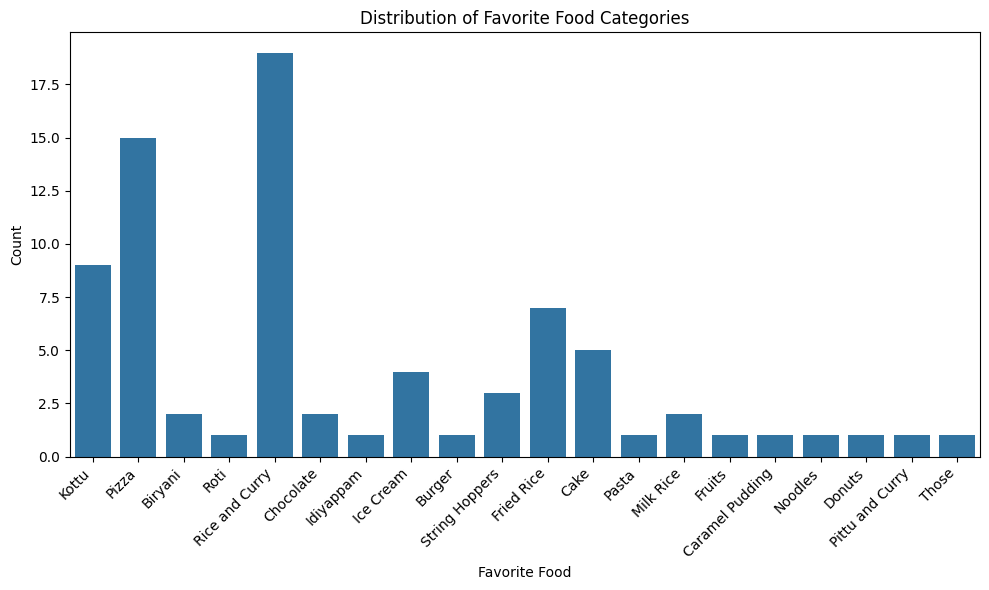

In [138]:
# Analyze the 'Favorite food' variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Favorite food ')
plt.title('Distribution of Favorite Food Categories')
plt.xlabel('Favorite Food')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [139]:
df.shape

(78, 12)

In [140]:
quantitative_variables = df.select_dtypes(include=[np.number])
qualitative_variables = df.select_dtypes(exclude=[np.number])

In [141]:
for column in qualitative_variables.columns:
  print(f"Categories for '{column}': {qualitative_variables[column].unique()}")

Categories for 'Gender': ['Male' 'Female']
Categories for 'Mode of transportation': ['motor bike' 'By foot' 'Bicycle' 'By bus']
Categories for 'Favorite food ': ['Kottu' 'Pizza' 'Biryani' 'Roti' 'Rice and Curry' 'Chocolate' 'Idiyappam'
 'Ice Cream' 'Burger' 'String Hoppers' 'Fried Rice' 'Cake' 'Pasta'
 'Milk Rice' 'Fruits' 'Caramel Pudding' 'Noodles' 'Donuts'
 'Pittu and Curry' 'Those']
Categories for 'preferred learning style': ['by watching videos' 'with the help of AI' 'by learning from others'
 'by attending to lectures' 'writing and looking through reference books']
Categories for 'mobile service provider in use': ['Mobitel' 'Hutch' 'Dialog' 'Airtel']


##Measure the central trendency

In [142]:
# Quantitative variables: 'Reg_No(last 4 digits)', 'Height', 'Weight', 'Study hours per week', 'Sleep hours per day'
quantitative_variables.describe()

# Measures of central tendency
for column in quantitative_variables.columns:
  print(f"Column: {column}")
  print(f"Mean: {quantitative_variables[column].mean()}")
  print(f"Median: {quantitative_variables[column].median()}")
  try:
    print(f"Mode: {quantitative_variables[column].mode().iloc[0]}")
  except:
    print("Mode: No unique mode found")
  print("-" * 20)

Column: Reg_No(last 4 digits)
Mean: 5185.217948717948
Median: 5157.5
Mode: 4906
--------------------
Column: Age
Mean: 23.03846153846154
Median: 23.0
Mode: 23
--------------------
Column: Height
Mean: 167.81052631578947
Median: 168.0
Mode: 165.0
--------------------
Column: Weight
Mean: 62.805128205128206
Median: 60.0
Mode: 65.0
--------------------
Column: Study hours per week
Mean: 25.487179487179485
Median: 20.0
Mode: 20
--------------------
Column: Sleep hours per day
Mean: 6.705128205128205
Median: 6.0
Mode: 6.0
--------------------
Column: OGPA 
Mean: 3.2483461538461538
Median: 3.24
Mode: 3.3
--------------------


In [143]:
# Generate a table for measures of central tendency
measures_of_ct = pd.DataFrame({
    'Mean': quantitative_variables.mean(),
    'Median': quantitative_variables.median(),
    'Mode': quantitative_variables.mode().iloc[0]
})

measures_of_ct


,Mean,Median,Mode
Reg_No(last 4 digits),5185.217949,5157.50,4906.0
Age,23.038462,23.00,23.0
Height,167.810526,168.00,165.0
Weight,62.805128,60.00,65.0
Study hours per week,25.487179,20.00,20.0
Sleep hours per day,6.705128,6.00,6.0
OGPA,3.248346,3.24,3.3


## Measures of dispersion (range, variance, standard deviation).


In [144]:
measures_of_dispersion = pd.DataFrame({
    'Range': quantitative_variables.max() - quantitative_variables.min(),
    'Variance': quantitative_variables.var(),
    'Standard Deviation': quantitative_variables.std(),
    'Interquartile Range (IQR)': quantitative_variables.quantile(0.75) - quantitative_variables.quantile(0.25)
})

measures_of_dispersion

,Range,Variance,Standard Deviation,Interquartile Range (IQR)
Reg_No(last 4 digits),546.0,26594.977855,163.079667,265.5000
Age,2.0,0.453047,0.673088,0.0000
Height,34.0,75.020688,8.661448,13.2500
Weight,118.5,233.425688,15.278275,12.7500
Study hours per week,112.0,456.564769,21.367376,16.0000
Sleep hours per day,56.0,38.392441,6.196163,1.0000
OGPA,0.7,0.017829,0.133524,0.1575


###Use of frequency tables and relative frequencies for categorical data give the each categorical data as a printed tables

In [147]:
# Function to create frequency table and relative frequency table
def create_frequency_tables(df, column):
    # Frequency table
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Frequency']

    # Relative frequency table
    relative_freq_table = df[column].value_counts(normalize=True).reset_index()
    relative_freq_table.columns = [column, 'Relative Frequency']
    relative_freq_table['Relative Frequency'] = relative_freq_table['Relative Frequency'].apply(lambda x: f'{x:.2%}') # Format as percentage

    return freq_table, relative_freq_table

# Qualitative variables for which to generate frequency tables
qualitative_columns_of_interest = qualitative_variables.columns.tolist() # Using the previously identified qualitative variables

# Print frequency and relative frequency tables for each qualitative variable
for col in qualitative_columns_of_interest:
    print(f"\n--- Frequency and Relative Frequency Table for '{col}' ---")
    freq_table, relative_freq_table = create_frequency_tables(df, col)

    print("\nFrequency Table:")
    print(freq_table.to_string(index=False))

    print("\nRelative Frequency Table:")
    print(relative_freq_table.to_string(index=False))
    print("-" * 40)


--- Frequency and Relative Frequency Table for 'Gender' ---

Frequency Table:
Gender  Frequency
  Male         56
Female         22

Relative Frequency Table:
Gender Relative Frequency
  Male             71.79%
Female             28.21%
----------------------------------------

--- Frequency and Relative Frequency Table for 'Mode of transportation' ---

Frequency Table:
Mode of transportation  Frequency
               By foot         73
            motor bike          3
               Bicycle          1
                By bus          1

Relative Frequency Table:
Mode of transportation Relative Frequency
               By foot             93.59%
            motor bike              3.85%
               Bicycle              1.28%
                By bus              1.28%
----------------------------------------

--- Frequency and Relative Frequency Table for 'Favorite food ' ---

Frequency Table:
 Favorite food   Frequency
 Rice and Curry         19
          Pizza         15
          

/tmp/ipython-input-153-3053455410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='preferred learning style', order=df['preferred learning style'].value_counts().index, palette='viridis')


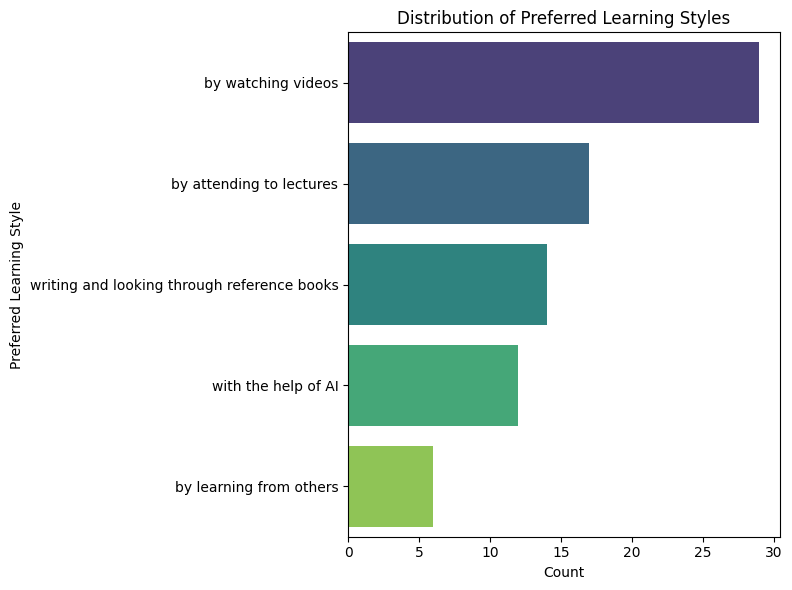

/tmp/ipython-input-153-3053455410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='mobile service provider in use', order=df['mobile service provider in use'].value_counts().index, palette='viridis')


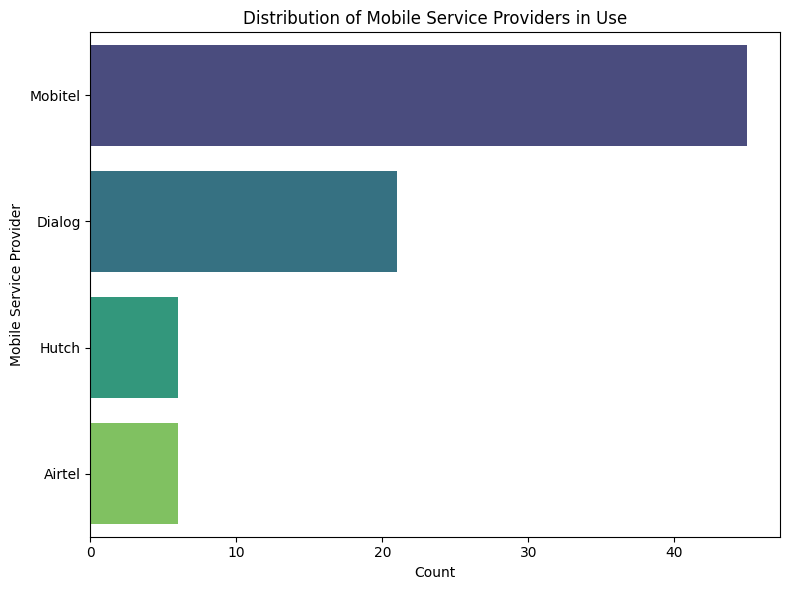

/tmp/ipython-input-153-3053455410.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Height', kde=True, bins=10, palette='viridis')


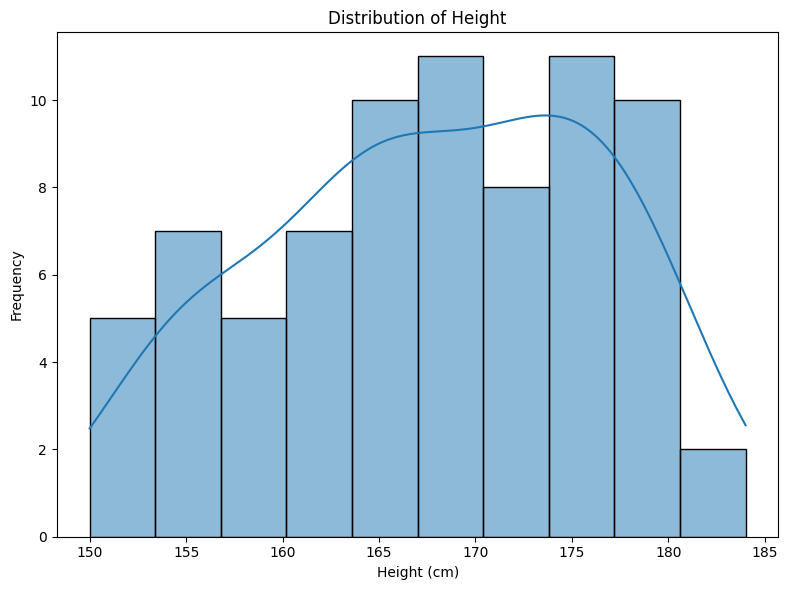

/tmp/ipython-input-153-3053455410.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Weight', kde=True, bins=10, palette='viridis')


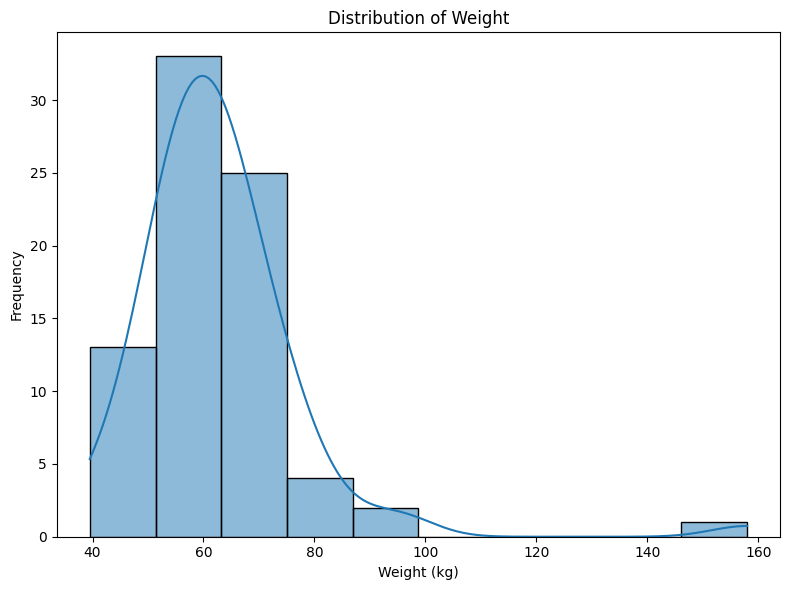

/tmp/ipython-input-153-3053455410.py:41: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Study hours per week', kde=True, bins=10, palette='viridis')


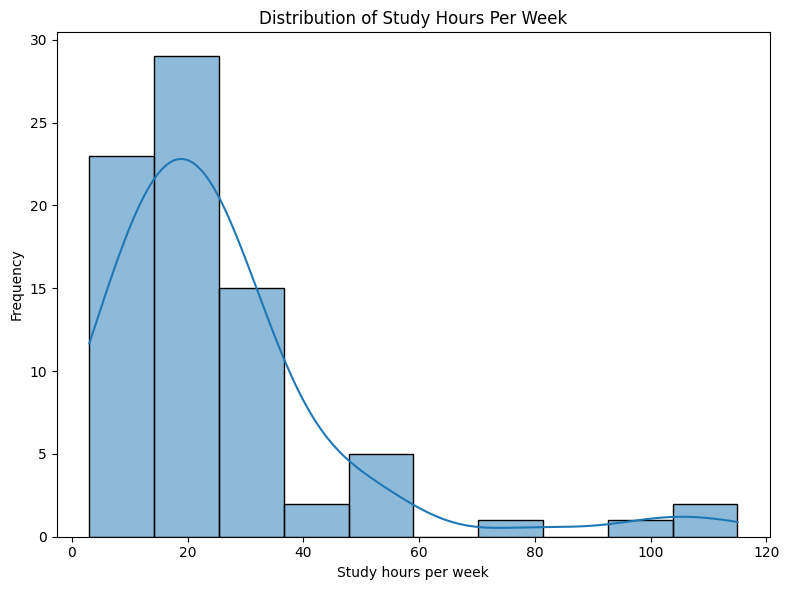

/tmp/ipython-input-153-3053455410.py:50: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Sleep hours per day', kde=True, bins=10, palette='viridis')


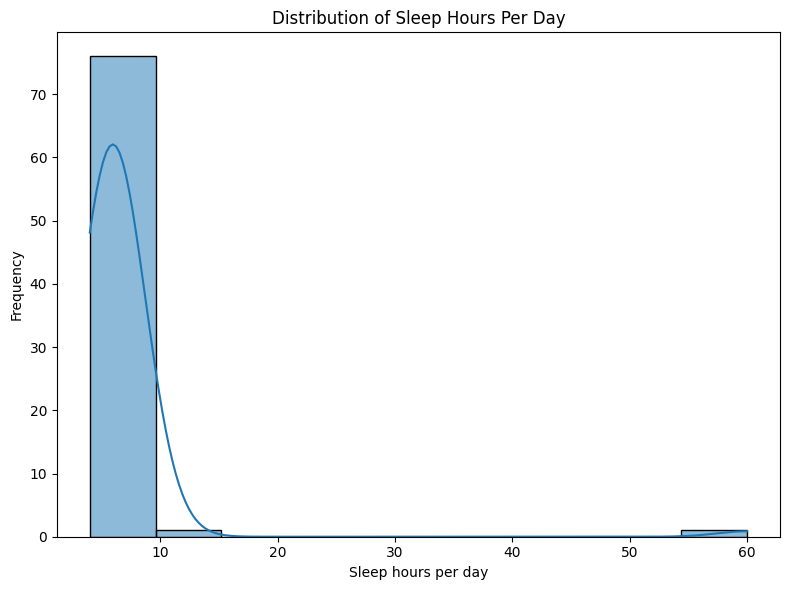

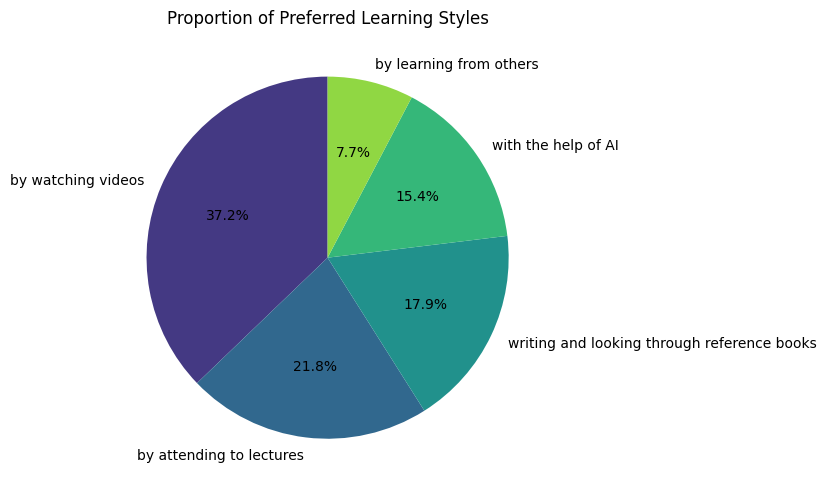

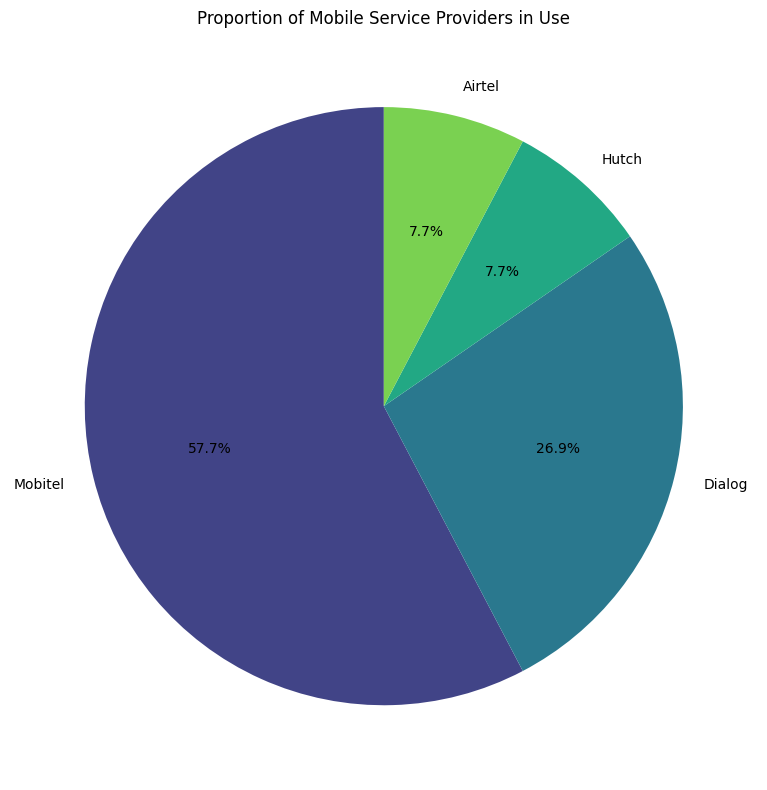

/tmp/ipython-input-153-3053455410.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Height', palette='viridis')


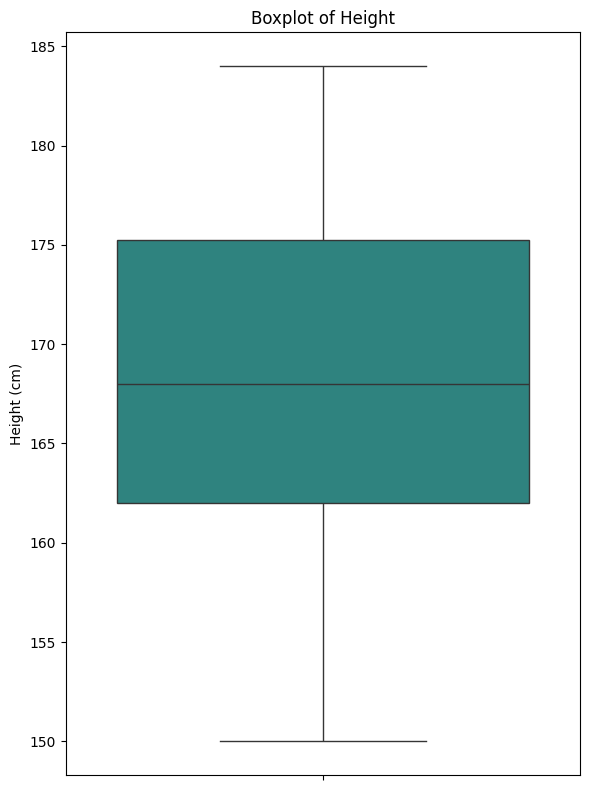

/tmp/ipython-input-153-3053455410.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Weight', palette='viridis')


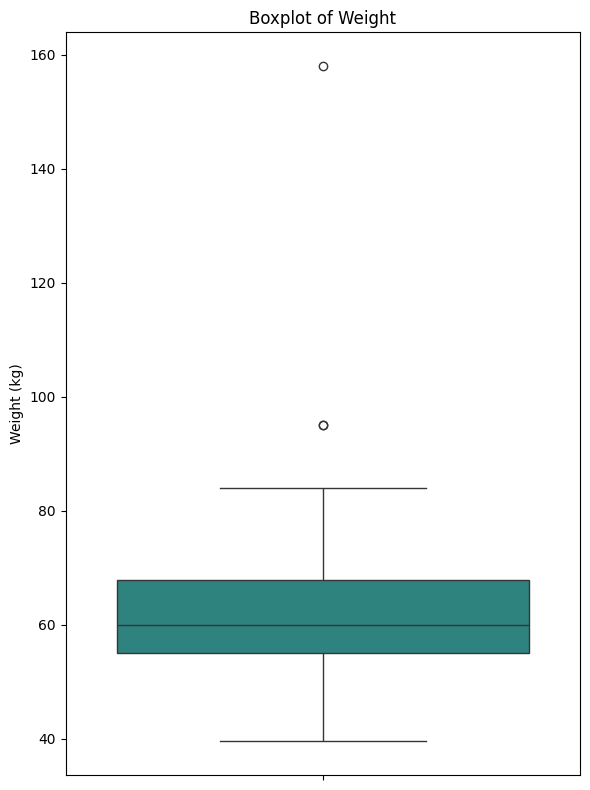

/tmp/ipython-input-153-3053455410.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Study hours per week', palette='viridis')


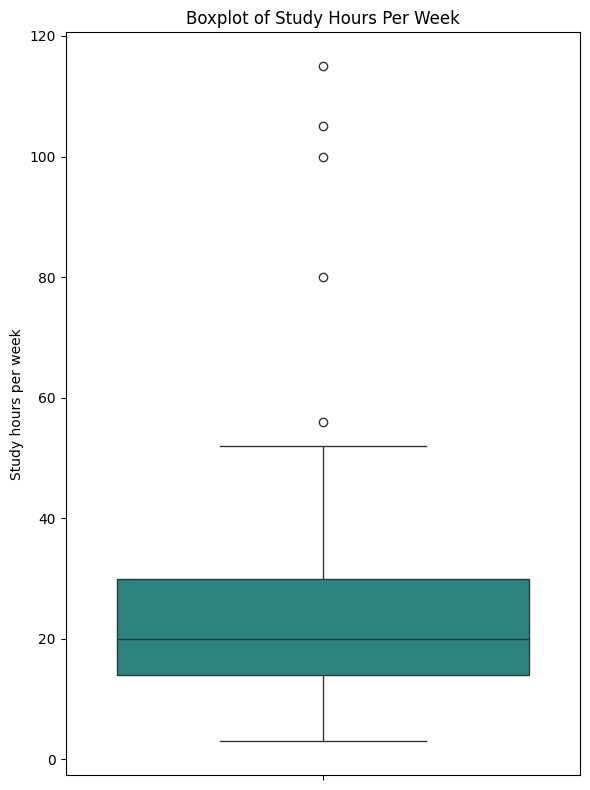

/tmp/ipython-input-153-3053455410.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Sleep hours per day', palette='viridis')


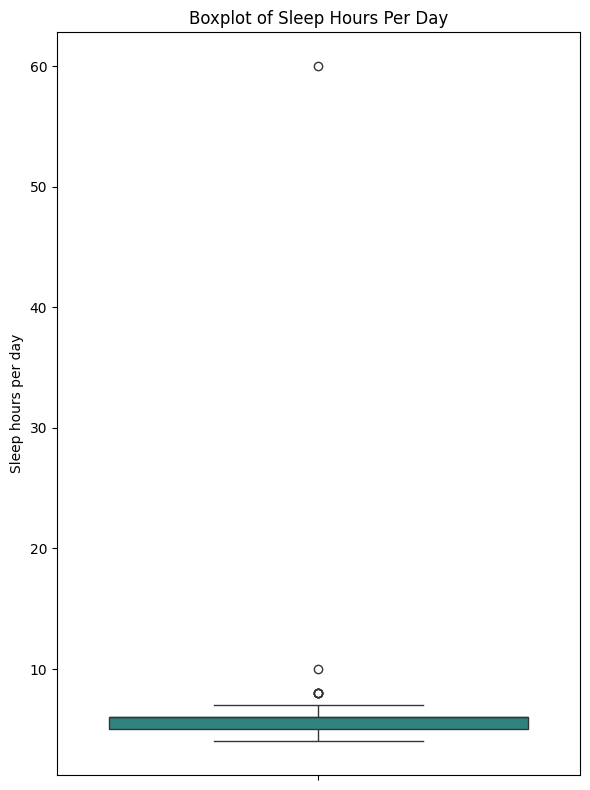

In [153]:

# --- Create appropriate charts/graphs ---

# Bar Chart for 'preferred learning style'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='preferred learning style', order=df['preferred learning style'].value_counts().index, palette='viridis')
plt.title('Distribution of Preferred Learning Styles')
plt.xlabel('Count')
plt.ylabel('Preferred Learning Style')
plt.tight_layout()
plt.show()

# Bar Chart for 'mobile service provider in use'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='mobile service provider in use', order=df['mobile service provider in use'].value_counts().index, palette='viridis')
plt.title('Distribution of Mobile Service Providers in Use')
plt.xlabel('Count')
plt.ylabel('Mobile Service Provider')
plt.tight_layout()
plt.show()

# Histogram for 'Height'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Height', kde=True, bins=10, palette='viridis')
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram for 'Weight'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Weight', kde=True, bins=10, palette='viridis')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram for 'Study hours per week'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Study hours per week', kde=True, bins=10, palette='viridis')
plt.title('Distribution of Study Hours Per Week')
plt.xlabel('Study hours per week')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram for 'Sleep hours per day'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sleep hours per day', kde=True, bins=10, palette='viridis')
plt.title('Distribution of Sleep Hours Per Day')
plt.xlabel('Sleep hours per day')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Pie Chart for 'preferred learning style'
plt.figure(figsize=(8, 8))
df['preferred learning style'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df['preferred learning style'].unique())))
plt.title('Proportion of Preferred Learning Styles')
plt.ylabel('') # Hide the default 'preferred learning style' label on y-axis
plt.tight_layout()
plt.show()

# Pie Chart for 'mobile service provider in use'
plt.figure(figsize=(8, 8))
df['mobile service provider in use'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df['mobile service provider in use'].unique())))
plt.title('Proportion of Mobile Service Providers in Use')
plt.ylabel('') # Hide the default 'mobile service provider in use' label on y-axis
plt.tight_layout()
plt.show()


# Boxplot for 'Height'
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='Height', palette='viridis')
plt.title('Boxplot of Height')
plt.ylabel('Height (cm)')
plt.tight_layout()
plt.show()

# Boxplot for 'Weight'
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='Weight', palette='viridis')
plt.title('Boxplot of Weight')
plt.ylabel('Weight (kg)')
plt.tight_layout()
plt.show()

# Boxplot for 'Study hours per week'
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='Study hours per week', palette='viridis')
plt.title('Boxplot of Study Hours Per Week')
plt.ylabel('Study hours per week')
plt.tight_layout()
plt.show()

# Boxplot for 'Sleep hours per day'
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='Sleep hours per day', palette='viridis')
plt.title('Boxplot of Sleep Hours Per Day')
plt.ylabel('Sleep hours per day')
plt.tight_layout()
plt.show()

#Check the relationship between the variables, qualitative and quantitative

###Check the relationship between the quantitative variablees


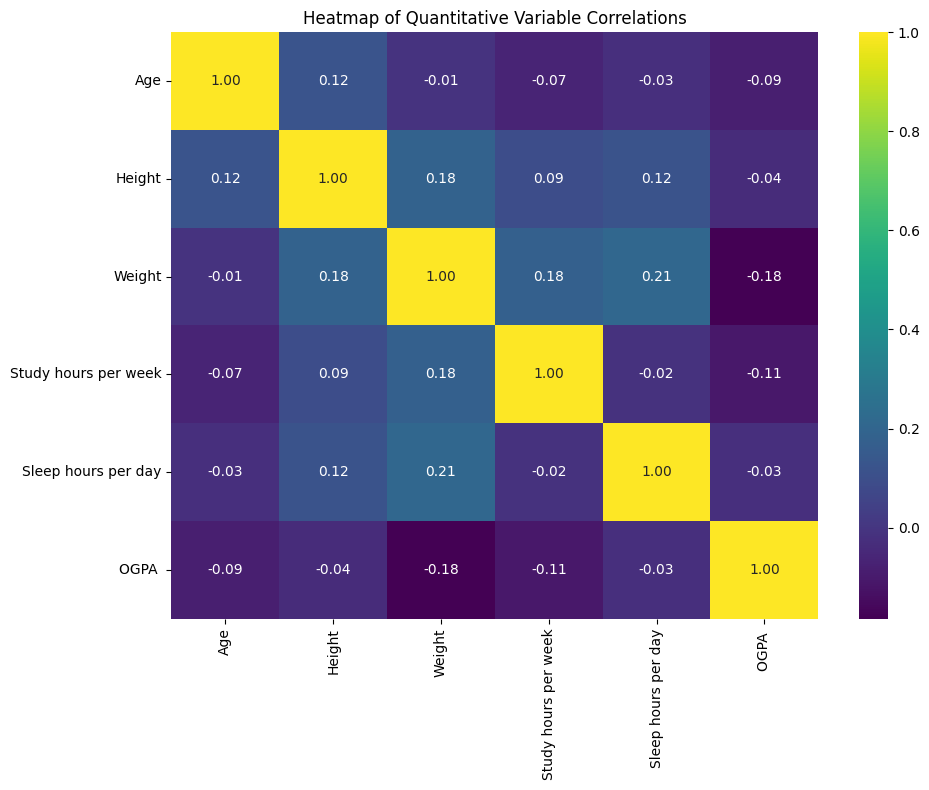

In [154]:
# Select only the quantitative columns
quantitative_df = df.select_dtypes(include=[np.number])

# Drop the 'Reg_No(last 4 digits)' column from the heatmap as it's not a typical quantitative variable for correlation
quantitative_df = quantitative_df.drop('Reg_No(last 4 digits)', axis=1)

# Calculate the correlation matrix
correlation_matrix = quantitative_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Quantitative Variable Correlations')
plt.tight_layout()
plt.show()

### cramers v heatmap for the qualitative variables

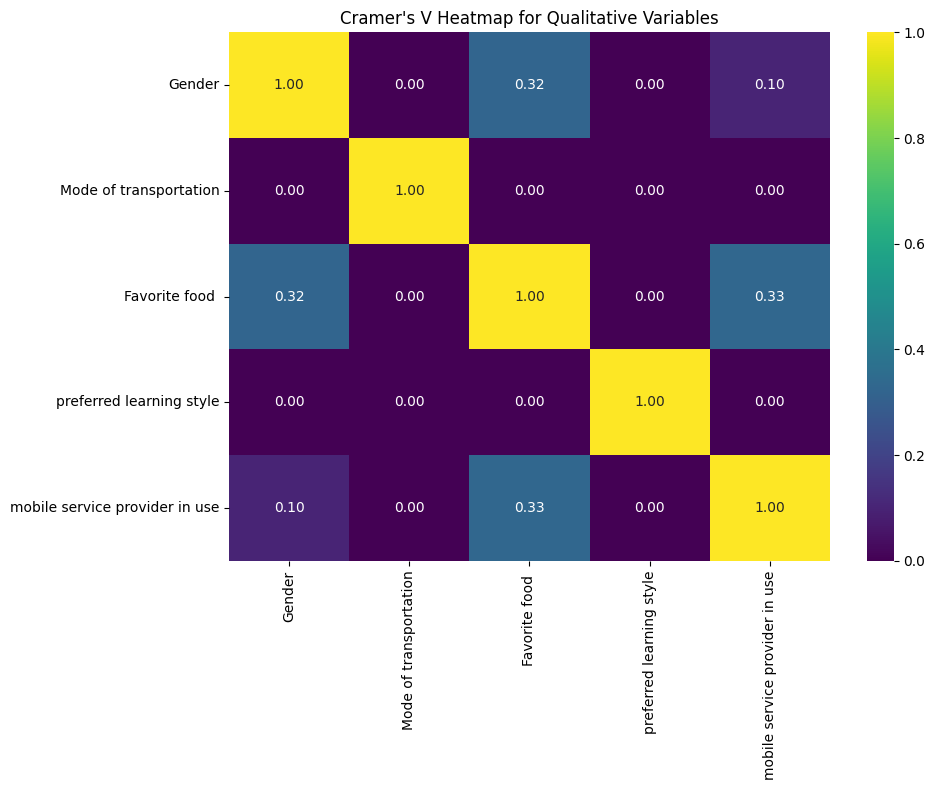

In [156]:
from scipy import stats

def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for two categorical variables.

    Args:
        x (pd.Series): First categorical variable.
        y (pd.Series): Second categorical variable.

    Returns:
        float: Cramer's V statistic.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Corrected phi2 for bias (optional but recommended)
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    # Corrected r and k for bias
    r_corrected = r - ((r-1)**2)/(n-1)
    k_corrected = k - ((k-1)**2)/(n-1)
    # Cramer's V
    v = np.sqrt(phi2_corrected / min(k_corrected - 1, r_corrected - 1))
    return v

# Select only the qualitative columns
qualitative_df_for_cramers = df[qualitative_variables.columns.tolist()]

# Calculate Cramer's V matrix
cramers_v_matrix = pd.DataFrame(index=qualitative_df_for_cramers.columns, columns=qualitative_df_for_cramers.columns)

for col1 in cramers_v_matrix.columns:
    for col2 in cramers_v_matrix.columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(qualitative_df_for_cramers[col1], qualitative_df_for_cramers[col2])

# Convert the matrix to numeric for heatmap plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Cramer's V Heatmap for Qualitative Variables")
plt.tight_layout()
plt.show()